In [1]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  23.66 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  34.70 MB/s


In [2]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  24.13 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  28.80 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  37.35 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  38.33 MB/s


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [4]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [6]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [7]:
newyork_data

{'bbox': [-74.2492599487305,
  40.5033187866211,
  -73.7061614990234,
  40.9105606079102],
 'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}, 'type': 'name'},
 'features': [{'geometry': {'coordinates': [-73.84720052054902,
     40.89470517661],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.1',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661],
    'borough': 'Bronx',
    'name': 'Wakefield',
    'stacked': 1},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-73.82993910812398, 40.87429419303012],
    'type': 'Point'},
   'geometry_name': 'geom',
   'id': 'nyu_2451_34572.2',
   'properties': {'annoangle': 0.0,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.874294193

In [8]:
#Notice how all the data in the features key
neighborhoods_data = newyork_data['features']

In [9]:
neighborhoods_data[0] #look at first item in list

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

# Transform data into a pandas dataframe

In [10]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

### Take a look at the empty dataframe

In [11]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


### Loop through the data and fill the dataframe one row at a time

In [12]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [13]:
neighborhoods.head() # Examining the resulting dataframe

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [14]:
#Check that the dataframe has all the boroughs and neighbourhoods
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


# Use geopy library to get the latitude and longitude values of New York City

In [15]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7308619, -73.9871558.


## Since our business research interests are in Bronx, we therefore segment and cluster only the neighborhoods in Bronx

In [16]:
Bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
Bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [17]:
#Getting the geo coordinates of Bronx
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.85048545, -73.8404035580209.


In [18]:
#Lets visualize Bronx and the neighbourhoods in it by creating a map of Bronx using latitude and longitude values
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Bronx_data['Latitude'], Bronx_data['Longitude'], Bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

# Define Foursquare credentials

In [19]:
CLIENT_ID = 'Y3XZEGNXCBVA3NOWDHMNFBXUYHXAQSPGDAUTIZIL44GQHAL0' # your Foursquare ID
CLIENT_SECRET = '51A10IP0HWEKMBX5230ED12KF3VYOAOEIIWVD4XE2ZMG3XRF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y3XZEGNXCBVA3NOWDHMNFBXUYHXAQSPGDAUTIZIL44GQHAL0
CLIENT_SECRET:51A10IP0HWEKMBX5230ED12KF3VYOAOEIIWVD4XE2ZMG3XRF


## Lets explore the first neighborhood in our dataframe

In [20]:
Bronx_data.loc[0, 'Neighborhood']

'Wakefield'

### Get the neigbourhood's latitude and longitude values

In [21]:
neighborhood_latitude = Bronx_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Bronx_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Bronx_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [22]:
#Lets get the top 100 venues that are in Wakefield within a radius of 500m
# type your answer here
LIMIT=100
radius=500
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude,
    neighborhood_longitude,
    radius,
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=Y3XZEGNXCBVA3NOWDHMNFBXUYHXAQSPGDAUTIZIL44GQHAL0&client_secret=51A10IP0HWEKMBX5230ED12KF3VYOAOEIIWVD4XE2ZMG3XRF&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [23]:
#Send the GET request and examine results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c93b1466a607153446d8a05'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4c537892fd2ea593cb077a28-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dessert_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1d0941735',
         'name': 'Dessert Shop',
         'pluralName': 'Dessert Shops',
         'primary': True,
         'shortName': 'Desserts'}],
       'id': '4c537892fd2ea593cb077a28',
       'location': {'address': '4120 Baychester Ave',
        'cc': 'US',
        'city': 'Bronx',
        'country': 'United States',
        'crossStreet': 'Edenwald & Bussing Ave',
        'distance': 127,
        'formattedAddress': ['4120 Baychester Ave (Edenwald & Bussing Ave)',
         'Bronx, NY 10466',
         'United 

In [24]:
#Borrow the get_category_type from Foursquare lab
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Clean the json and structure it into a pandas dataframe

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Rite Aid,Pharmacy,40.896649,-73.844846
2,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
3,Dunkin Donuts,Donut Shop,40.890459,-73.849089
4,SUBWAY,Sandwich Place,40.890656,-73.849192


In [26]:
# The number of venues returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


# Explore Neighbourhoods in Bronx
#### We repeat like we did with the neighbourhoods of Wakefield

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## A code to create a new dataframe called bronx_venues

In [28]:
bronx_venues = getNearbyVenues(names=Bronx_data['Neighborhood'],
                                   latitudes=Bronx_data['Latitude'],
                                   longitudes=Bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [29]:
print(bronx_venues.shape)
bronx_venues.head()

(1199, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Dunkin Donuts,40.890459,-73.849089,Donut Shop
4,Wakefield,40.894705,-73.847201,SUBWAY,40.890656,-73.849192,Sandwich Place


In [30]:
# checking how many venues were returned for each neighbourhood
bronx_venues.groupby('Neighborhood').count() 

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,24,24,24,24,24,24
Baychester,20,20,20,20,20,20
Bedford Park,35,35,35,35,35,35
Belmont,94,94,94,94,94,94
Bronxdale,14,14,14,14,14,14
Castle Hill,6,6,6,6,6,6
City Island,24,24,24,24,24,24
Claremont Village,16,16,16,16,16,16
Clason Point,10,10,10,10,10,10


In [31]:
#How many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 167 uniques categories.


# Now Analyse Each Neighbourhood

In [32]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,Airport Tram,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Bike Trail,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,High School,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Venue,Nightclub,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Supermarket,Supplement Shop,Sushi Restaurant,Tanning Salon,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Weight Loss Center,Wings Joint,Women's Store,Yoga Studio
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [33]:
bronx_onehot.shape # new dataframe size

(1199, 168)

## Next, let us group rows by neighbourhood and by taking the mean of the frequency of occurence of each category

In [34]:
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped

,Neighborhood,Accessories Store,African Restaurant,Airport Tram,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Bike Trail,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,High School,Historic Site,History Museum,Home Service,Hookah Bar,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Venue,Nightclub,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Rental Car Location,Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Social Club,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Supermarket,Supplement Shop,Sushi Restaurant,Tanning Salon,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Track,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Weight Loss Center,Wings Joint,Women's Store,Yoga Studio
0,Allerton,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667,0.041667,0.000000,0.041667,0.000000,0.00000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.166667,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.083333,0.041667,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Baychester,0.000000,0.000000,0.000000,0.050000,0.05,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.0000

In [36]:
bronx_grouped.shape

(52, 168)

## Lets print each neighbourhood along with the top 5 most common venues

In [37]:
num_top_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
           venue  freq
0    Pizza Place  0.17
1    Supermarket  0.12
2            Spa  0.08
3  Deli / Bodega  0.04
4     Bike Trail  0.04


----Baychester----
                venue  freq
0      Discount Store  0.05
1      Sandwich Place  0.05
2  Spanish Restaurant  0.05
3         Supermarket  0.05
4      Breakfast Spot  0.05


----Bedford Park----
                 venue  freq
0                Diner  0.09
1   Mexican Restaurant  0.09
2  Fried Chicken Joint  0.06
3       Sandwich Place  0.06
4          Pizza Place  0.06


----Belmont----
                venue  freq
0  Italian Restaurant  0.19
1       Deli / Bodega  0.10
2         Pizza Place  0.09
3              Bakery  0.05
4        Dessert Shop  0.03


----Bronxdale----
                         venue  freq
0           Italian Restaurant  0.14
1                         Bank  0.07
2                Deli / Bodega  0.07
3                  Pizza Place  0.07
4  Eastern European Restaurant  0.07


----Castle Hill----
         

## Important information for our analysis: Lets put in in a pandas dataframe

In [38]:
# A function to sort the veunes in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Now lets create the new dataframe and display the top 10 venues for each neighbourhood

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Supermarket,Spa,Martial Arts Dojo,Pharmacy,Deli / Bodega,Department Store,Dessert Shop,Chinese Restaurant,Discount Store
1,Baychester,Fried Chicken Joint,Bank,Men's Store,Fast Food Restaurant,Breakfast Spot,Electronics Store,Sandwich Place,Mexican Restaurant,Spanish Restaurant,Supermarket
2,Bedford Park,Mexican Restaurant,Diner,Supermarket,Food Truck,Fried Chicken Joint,Sandwich Place,Pizza Place,Chinese Restaurant,Deli / Bodega,Discount Store
3,Belmont,Italian Restaurant,Deli / Bodega,Pizza Place,Bakery,Grocery Store,Dessert Shop,Food & Drink Shop,Bank,Spanish Restaurant,Liquor Store
4,Bronxdale,Italian Restaurant,Deli / Bodega,Pizza Place,Performing Arts Venue,Paper / Office Supplies Store,Gym,Spanish Restaurant,Chinese Restaurant,Mexican Restaurant,Breakfast Spot


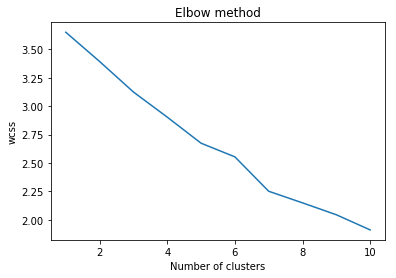

In [40]:
from sklearn.cluster import KMeans
wcss=[]
bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0).fit(bronx_grouped_clustering)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

# Cluster Neighboohoods using K-Means

In [41]:
# set number of clusters
kclusters = 7

bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 5, 5, 2, 2, 5, 5, 5, 3, 0], dtype=int32)

## Lets create a new dataframe that includes the cluster as well as the top 10 venues for each neighbourhood

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bronx_merged = Bronx_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bronx_merged = bronx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0,Sandwich Place,Laundromat,Pharmacy,Ice Cream Shop,Dessert Shop,Food Truck,Caribbean Restaurant,Donut Shop,Farmers Market,Eye Doctor
1,Bronx,Co-op City,40.874294,-73.829939,0,Fast Food Restaurant,Bus Station,Restaurant,Mattress Store,Pharmacy,Basketball Court,Baseball Field,Discount Store,Gift Shop,Pizza Place
2,Bronx,Eastchester,40.887556,-73.827806,0,Bus Station,Caribbean Restaurant,Metro Station,Diner,Bus Stop,Juice Bar,Fast Food Restaurant,Deli / Bodega,Bowling Alley,Seafood Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,1,Playground,Music Venue,River,Dive Bar,Farmers Market,Eye Doctor,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop
4,Bronx,Riverdale,40.890834,-73.912585,3,Hotel,Bank,Home Service,Plaza,Food Truck,Park,Gym,Bus Station,Farmers Market,Eye Doctor


## Lets visualize the resulting clusters

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Cluster Analysis 
### Now we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defing categories, we can then asign a name to each cluster

## Cluster 1

In [47]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 0, bronx_merged.columns[[1] + list(range(7, bronx_merged.shape[1]))]]

,Neighborhood,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Pharmacy,Ice Cream Shop,Dessert Shop,Food Truck,Caribbean Restaurant,Donut Shop,Farmers Market,Eye Doctor
1,Co-op City,Restaurant,Mattress Store,Pharmacy,Basketball Court,Baseball Field,Discount Store,Gift Shop,Pizza Place
2,Eastchester,Metro Station,Diner,Bus Stop,Juice Bar,Fast Food Restaurant,Deli / Bodega,Bowling Alley,Seafood Restaurant
17,West Farms,Chinese Restaurant,Park,Lounge,Sandwich Place,Supermarket,Donut Shop,Basketball Court,Metro Station
22,Longwood,Fast Food Restaurant,Bus Station,Latin American Restaurant,Donut Shop,Mexican Restaurant,Diner,Deli / Bodega,Distillery
24,Morrisania,Fast Food Restaurant,Grocery Store,Donut Shop,Bakery,Fish & Chips Shop,Metro Station,Bus Stop,Bowling Alley
36,Pelham Bay,Diner,Convenience Store,Donut Shop,Chinese Restaurant,Fast Food Restaurant,Bank,Sandwich Place,Salon / Barbershop
37,Schuylerville,Mexican Restaurant,Pharmacy,Bar,Hookah Bar,Convenience Store,Diner,Donut Shop,Sandwich Place
41,Pelham Gardens,Donut Shop,Deli / Bodega,BBQ Joint,Sandwich Place,Spanish Restaurant,Boat or Ferry,Café,Rental Car Location
43,Unionport,Pizza Place,Seafood Restaurant,Sandwich Place,Lounge,Juice Bar,Electronics Store,Caribbean Restaurant,Spanish Restaurant


## Cluster 2

In [48]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 1, bronx_merged.columns[[1] + list(range(7, bronx_merged.shape[1]))]]

,Neighborhood,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Fieldston,River,Dive Bar,Farmers Market,Eye Doctor,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop


## Cluster 3

In [49]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 2, bronx_merged.columns[[1] + list(range(7, bronx_merged.shape[1]))]]

,Neighborhood,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Woodlawn,Deli / Bodega,Pub,Bakery,Pharmacy,Plaza,Rental Car Location,Moving Target,Donut Shop
10,Pelham Parkway,Sushi Restaurant,Deli / Bodega,Coffee Shop,Chinese Restaurant,Bus Station,Sandwich Place,Donut Shop,Mexican Restaurant
27,Throgs Neck,Bar,Juice Bar,Sports Bar,Asian Restaurant,Italian Restaurant,American Restaurant,Pizza Place,Baseball Field
31,Van Nest,Bakery,Coffee Shop,BBQ Joint,Donut Shop,Playground,Restaurant,Bus Station,Spanish Restaurant
32,Morris Park,Deli / Bodega,Bar,Burger Joint,Yoga Studio,Buffet,Sandwich Place,Supermarket,Restaurant
33,Belmont,Pizza Place,Bakery,Grocery Store,Dessert Shop,Food & Drink Shop,Bank,Spanish Restaurant,Liquor Store
35,North Riverdale,Bank,Coffee Shop,Chinese Restaurant,Pool,Moving Target,Donut Shop,Mexican Restaurant,Sandwich Place
38,Edgewater Park,Deli / Bodega,Pizza Place,Coffee Shop,Liquor Store,Sports Bar,Beach,Bar,Pub
49,Bronxdale,Pizza Place,Performing Arts Venue,Paper / Office Supplies Store,Gym,Spanish Restaurant,Chinese Restaurant,Mexican Restaurant,Breakfast Spot


## Cluster 4

In [50]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(7, bronx_merged.shape[1]))]]

,Neighborhood,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Riverdale,Home Service,Plaza,Food Truck,Park,Gym,Bus Station,Farmers Market,Eye Doctor
26,Clason Point,Boat or Ferry,Pool,Grocery Store,South American Restaurant,Bus Stop,Yoga Studio,Eye Doctor,Electronics Store
34,Spuyten Duyvil,Pizza Place,Intersection,Scenic Lookout,Bus Stop,Bank,Thai Restaurant,Tennis Stadium,Dive Bar


## Cluster 5

In [51]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 4, bronx_merged.columns[[1] + list(range(7, bronx_merged.shape[1]))]]

,Neighborhood,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Williamsbridge,Caribbean Restaurant,Nightclub,Yoga Studio,Dry Cleaner,Fast Food Restaurant,Farmers Market,Eye Doctor,Electronics Store


# Cluster 6

In [52]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 5, bronx_merged.columns[[1] + list(range(7, bronx_merged.shape[1]))]]

,Neighborhood,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Kingsbridge,Sandwich Place,Discount Store,Deli / Bodega,Mexican Restaurant,Supermarket,Chinese Restaurant,Donut Shop,Latin American Restaurant
7,Norwood,Pharmacy,Bank,Mexican Restaurant,Chinese Restaurant,Supermarket,Restaurant,Caribbean Restaurant,Liquor Store
9,Baychester,Men's Store,Fast Food Restaurant,Breakfast Spot,Electronics Store,Sandwich Place,Mexican Restaurant,Spanish Restaurant,Supermarket
11,City Island,Thrift / Vintage Store,Pizza Place,Bank,Deli / Bodega,Diner,Music Venue,Smoke Shop,Boat or Ferry
12,Bedford Park,Supermarket,Food Truck,Fried Chicken Joint,Sandwich Place,Pizza Place,Chinese Restaurant,Deli / Bodega,Discount Store
13,University Heights,Pizza Place,Deli / Bodega,Burger Joint,Fast Food Restaurant,Sandwich Place,Bus Station,Donut Shop,Latin American Restaurant
14,Morris Heights,Pizza Place,Playground,Plaza,Grocery Store,Spanish Restaurant,Chinese Restaurant,Supermarket,Bank
15,Fordham,Mobile Phone Shop,Fast Food Restaurant,Donut Shop,Gym / Fitness Center,Clothing Store,Chinese Restaurant,Bank,Pharmacy
16,East Tremont,Café,Latin American Restaurant,Paella Restaurant,Discount Store,Chinese Restaurant,Restaurant,Mobile Phone Shop,Mexican Restaurant
18,High Bridge,Chinese Restaurant,Pharmacy,Gym,Discount Store,Bus Line,Seafood Restaurant,Bus Station,Spanish Restaurant


# Trending venues

In [53]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c9387fd1ed219272cfd6bce'},
 'response': {'venues': []}}

## Treding venues that are trending at this time: 14.51 CAT

In [54]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [55]:
# display trending venues
trending_venues_df

'No trending venues are available at the moment!'

In [56]:
if len(results['response']['venues']) == 0:
    venues_map = 'Cannot generate visual as no trending venues are available at the moment!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


    # add Ecco as a red circle mark
    folium.features.CircleMarker(
        [latitude, longitude],
        radius=10,
        popup='Ecco',
        fill=True,
        color='red',
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)


    # add the trending venues as blue circle markers
    for lat, lng, label in zip(trending_venues_df['location.lat'], trending_venues_df['location.lng'], trending_venues_df['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='blue',
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(venues_map)
venues_map

'Cannot generate visual as no trending venues are available at the moment!'